# 3주차 프로젝트 / 곽영효

- 공공자전거 

In [193]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

DIR2 = './서울특별시 공공자전거 이용정보(시간대별)_2021년/'
filelist2 = os.listdir(DIR2)

In [194]:
# Matplotlib 한글 Font 설정 ---------
from matplotlib import font_manager as fm, rc

# 한글 Font 설정
font_path = '../Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

In [195]:
# 엑셀 불러오기
data = []

for f in range(12):
    data.append(pd.read_csv(DIR2 + filelist2[f], encoding='utf-8')) 

data[0].head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5


In [196]:
data[0].isnull().sum()

대여일자           0
대여시간           0
대여소번호          0
대여소명           0
대여구분코드         0
성별        317622
연령대코드          0
이용건수           0
운동량            0
탄소량            0
이동거리           0
사용시간           0
dtype: int64

In [197]:
data[0].성별.unique()

array([nan, 'F', 'M', 'f', 'm'], dtype=object)

In [198]:
data[0].dtypes

대여일자       object
대여시간        int64
대여소번호       int64
대여소명       object
대여구분코드     object
성별         object
연령대코드      object
이용건수        int64
운동량        object
탄소량        object
이동거리      float64
사용시간        int64
dtype: object

In [199]:
for i in range(12):
    data[i].drop(labels=['대여소번호', '대여소명', '운동량', '탄소량'], axis = 1, inplace=True) 

In [200]:
for i in range(12):
    data[i].replace('f', 'F', inplace=True)
    data[i].replace('m', 'M', inplace=True)
    data[i].replace('~10대', '10대', inplace=True)

In [201]:
data[0].성별.unique()

array([nan, 'F', 'M'], dtype=object)

In [202]:
df = pd.concat([data[0], data[1], data[2], data[3], data[4], data[5], data[6], data[7], data[8], data[9], data[10], data[11]],
              ignore_index= True)
df

,대여일자,대여시간,대여구분코드,성별,연령대코드,이용건수,이동거리,사용시간
0,2021-01-01,0,정기권,NaN,10대,2,992.78,13
1,2021-01-01,0,정기권,NaN,10대,1,1127.50,10
2,2021-01-01,0,정기권,NaN,10대,1,0.00,7
3,2021-01-01,0,정기권,NaN,10대,1,1658.34,14
4,2021-01-01,0,정기권,NaN,10대,1,743.88,5
...,...,...,...,...,...,...,...,...
25421809,2021-12-31,23,정기권,M,50대,1,840.00,4
25421810,2021-12-31,23,정기권,M,50대,1,907.98,8
25421811,2021-12-31,23,정기권,M,60대,1,2063.26,13
25421812,2021-12-31,23,정기권,M,60대,1,950.00,8


In [203]:
df['대여일자'] = pd.to_datetime(df['대여일자'])
df.대여일자.info()

<class 'pandas.core.series.Series'>
RangeIndex: 25421814 entries, 0 to 25421813
Series name: 대여일자
Non-Null Count     Dtype         
--------------     -----         
25421814 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 194.0 MB


In [204]:
ranges = [0, 6, 9, 13, 18, 21,24]
labels = ['새벽(0~5)', '아침(6~8)', '오전(9~12)', '낮(1~5)', '저녁(6~8)', '밤(9~12)']

In [205]:
df['시간대'], retbins = pd.cut(x=df['대여시간'], bins = ranges, 
      labels = ['새벽(0~5)', '아침(6~8)', '오전(9~12)', '낮(1~5)', '저녁(6~8)', '밤(9~12)'],
      include_lowest = True, retbins=True)

retbins

array([ 0,  6,  9, 13, 18, 21, 24])

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25421814 entries, 0 to 25421813
Data columns (total 9 columns):
 #   Column  Dtype         
---  ------  -----         
 0   대여일자    datetime64[ns]
 1   대여시간    int64         
 2   대여구분코드  object        
 3   성별      object        
 4   연령대코드   object        
 5   이용건수    int64         
 6   이동거리    float64       
 7   사용시간    int64         
 8   시간대     category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 1.5+ GB


In [207]:
df['월'] = df.대여일자.dt.month
df['계절'] = df.대여일자.dt.month

In [208]:
df2 = df.대여일자.dt.dayofweek
df2.replace([0,1,2,3,4,5,6], ['월','화','수','목','금','토','일'], inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_4484\63871312.py:2: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  df2.replace([0,1,2,3,4,5,6], ['월','화','수','목','금','토','일'], inplace = True)


In [209]:
df['요일'] = df2
df.head()

,대여일자,대여시간,대여구분코드,성별,연령대코드,이용건수,이동거리,사용시간,시간대,월,계절,요일
0,2021-01-01,0,정기권,NaN,10대,2,992.78,13,새벽(0~5),1,1,금
1,2021-01-01,0,정기권,NaN,10대,1,1127.50,10,새벽(0~5),1,1,금
2,2021-01-01,0,정기권,NaN,10대,1,0.00,7,새벽(0~5),1,1,금
3,2021-01-01,0,정기권,NaN,10대,1,1658.34,14,새벽(0~5),1,1,금
4,2021-01-01,0,정기권,NaN,10대,1,743.88,5,새벽(0~5),1,1,금


In [210]:
df['계절'].replace([3,4,5], '봄', inplace=True)
df['계절'].replace([6,7,8], '여름', inplace=True)
df['계절'].replace([9,10,11], '가을', inplace=True)
df['계절'].replace([12,1,2], '겨울', inplace = True)
df

,대여일자,대여시간,대여구분코드,성별,연령대코드,이용건수,이동거리,사용시간,시간대,월,계절,요일
0,2021-01-01,0,정기권,NaN,10대,2,992.78,13,새벽(0~5),1,겨울,금
1,2021-01-01,0,정기권,NaN,10대,1,1127.50,10,새벽(0~5),1,겨울,금
2,2021-01-01,0,정기권,NaN,10대,1,0.00,7,새벽(0~5),1,겨울,금
3,2021-01-01,0,정기권,NaN,10대,1,1658.34,14,새벽(0~5),1,겨울,금
4,2021-01-01,0,정기권,NaN,10대,1,743.88,5,새벽(0~5),1,겨울,금
...,...,...,...,...,...,...,...,...,...,...,...,...
25421809,2021-12-31,23,정기권,M,50대,1,840.00,4,밤(9~12),12,겨울,금
25421810,2021-12-31,23,정기권,M,50대,1,907.98,8,밤(9~12),12,겨울,금
25421811,2021-12-31,23,정기권,M,60대,1,2063.26,13,밤(9~12),12,겨울,금
25421812,2021-12-31,23,정기권,M,60대,1,950.00,8,밤(9~12),12,겨울,금


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25421814 entries, 0 to 25421813
Data columns (total 12 columns):
 #   Column  Dtype         
---  ------  -----         
 0   대여일자    datetime64[ns]
 1   대여시간    int64         
 2   대여구분코드  object        
 3   성별      object        
 4   연령대코드   object        
 5   이용건수    int64         
 6   이동거리    float64       
 7   사용시간    int64         
 8   시간대     category      
 9   월       int64         
 10  계절      object        
 11  요일      object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 2.1+ GB


In [212]:
# 카테고리로 바꾸기

a = ['대여시간', '대여구분코드', '성별', '월', '계절', '요일']

for i in a:
    df[i] = df[i].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25421814 entries, 0 to 25421813
Data columns (total 12 columns):
 #   Column  Dtype         
---  ------  -----         
 0   대여일자    datetime64[ns]
 1   대여시간    category      
 2   대여구분코드  category      
 3   성별      category      
 4   연령대코드   object        
 5   이용건수    int64         
 6   이동거리    float64       
 7   사용시간    int64         
 8   시간대     category      
 9   월       category      
 10  계절      category      
 11  요일      category      
dtypes: category(7), datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.1+ GB


In [213]:
pivot1 = pd.pivot_table(df, index = '요일',
                       columns = '계절',
                       values = '이용건수',
                       aggfunc = 'sum')
pivot1 = pivot4.reset_index()
pivot1=pivot1.T
pivot1=pivot1[[3,6,2,1,0,5,4]]           # 뒤죽박죽 섞인 요일을 월 => 일 순서로 정렬
pivot1=pivot1.T
pivot1 = pivot1.set_index('요일')
pivot1

시간대,새벽(0~5),아침(6~8),오전(9~12),낮(1~5),저녁(6~8),밤(9~12)
요일,,,,,,
목,112481.316667,196751.733333,272633.383333,634347.983333,374383.766667,127143.333333
일,103268.383333,102276.416667,385267.966667,835978.416667,331352.166667,100769.766667
수,95509.483333,183951.066667,296921.133333,731347.316667,420722.216667,136707.716667
화,92914.566667,169368.733333,238882.0,555907.166667,318116.133333,103620.366667
월,89664.933333,173313.3,252702.783333,594159.4,346880.583333,111307.3
토,121440.616667,121761.8,358866.05,676308.283333,343240.333333,135942.95
금,103380.45,175172.366667,269132.983333,678529.5,398259.55,151022.416667


In [214]:
pivot2 = pd.pivot_table(df, index = '요일',
                       columns = '계절',
                       values = '사용시간',
                       aggfunc = 'sum')
pivot2 = pivot2.reset_index()
pivot2=pivot2.T
pivot2=pivot2[[3,6,2,1,0,5,4]]           # 뒤죽박죽 섞인 요일을 월 => 일 순서로 정렬
pivot2=pivot2.T
pivot2 = pivot2.set_index('요일')        
pivot2 = pivot2 / 60                     # 분 => 시간 변환

In [215]:
pivot2

계절,가을,겨울,봄,여름
요일,,,,
월,428180.6,185333.35,445025.966667,509488.383333
화,386129.1,160965.816667,442731.816667,488982.233333
수,499048.433333,208976.216667,614133.916667,543000.366667
목,597243.733333,183460.266667,465825.3,471212.216667
금,545987.983333,216116.883333,482223.8,531168.6
토,604751.816667,246273.65,375610.616667,530923.95
일,548674.6,246763.366667,570647.133333,492828.016667


In [216]:
pivot3 = pd.pivot_table(df, index = '요일',
                       columns = '시간대',
                       values = '이용건수',
                       aggfunc = 'sum')
pivot3 = pivot3.reset_index()
pivot3=pivot3.T
pivot3=pivot3[[3,6,2,1,0,5,4]]           # 뒤죽박죽 섞인 요일을 월 => 일 순서로 정렬
pivot3=pivot3.T
pivot3 = pivot3.set_index('요일')        

In [217]:
pivot3

시간대,새벽(0~5),아침(6~8),오전(9~12),낮(1~5),저녁(6~8),밤(9~12)
요일,,,,,,
월,250898,658237,612895,1381545,802014,293038
화,274498,655173,590101,1317986,746659,280426
수,282303,694346,695088,1645603,947709,349006
목,323609,758770,673296,1498880,861108,329671
금,299494,674200,659686,1559496,873476,363463
토,315821,321905,789740,1283049,656136,299986
일,252619,234303,732746,1464400,648515,239836


In [218]:
pivot4 = pd.pivot_table(df, index = '요일',
                       columns = '시간대',
                       values = '사용시간',
                       aggfunc = 'sum')
pivot4 = pivot4.reset_index()
pivot4=pivot4.T
pivot4=pivot4[[3,6,2,1,0,5,4]]           # 뒤죽박죽 섞인 요일을 월 => 일 순서로 정렬
pivot4=pivot4.T
pivot4 = pivot4.set_index('요일')   
pivot4 = pivot4/60

In [219]:
pivot4

시간대,새벽(0~5),아침(6~8),오전(9~12),낮(1~5),저녁(6~8),밤(9~12)
요일,,,,,,
월,89664.933333,173313.3,252702.783333,594159.4,346880.583333,111307.3
화,92914.566667,169368.733333,238882.0,555907.166667,318116.133333,103620.366667
수,95509.483333,183951.066667,296921.133333,731347.316667,420722.216667,136707.716667
목,112481.316667,196751.733333,272633.383333,634347.983333,374383.766667,127143.333333
금,103380.45,175172.366667,269132.983333,678529.5,398259.55,151022.416667
토,121440.616667,121761.8,358866.05,676308.283333,343240.333333,135942.95
일,103268.383333,102276.416667,385267.966667,835978.416667,331352.166667,100769.766667


In [220]:
pivot5 = pd.pivot_table(df, index = '연령대코드',
                       columns = '시간대',
                       values = '이용건수',
                       aggfunc = 'mean')
pivot5

시간대,새벽(0~5),아침(6~8),오전(9~12),낮(1~5),저녁(6~8),밤(9~12)
연령대코드,,,,,,
10대,1.107745,1.063899,1.068600,1.113882,1.134521,1.134972
20대,1.074850,1.166430,1.111950,1.214169,1.222911,1.188539
30대,1.032037,1.127565,1.065062,1.137504,1.120023,1.076223
40대,1.024958,1.086580,1.063315,1.106970,1.075838,1.039052
50대,1.019839,1.047531,1.036026,1.055740,1.041948,1.024404
60대,1.012013,1.016077,1.020022,1.022798,1.015780,1.010127
70대~,1.013667,1.007958,1.016142,1.014408,1.013705,1.009121


In [221]:
pivot6 = pd.pivot_table(df, index = '연령대코드',
                       columns = '시간대',
                       values = '사용시간',
                       aggfunc = 'mean')
pivot6

시간대,새벽(0~5),아침(6~8),오전(9~12),낮(1~5),저녁(6~8),밤(9~12)
연령대코드,,,,,,
10대,29.545552,15.216299,23.428899,27.784794,32.847966,28.347849
20대,23.868950,16.392943,24.326453,31.060401,33.603348,29.578664
30대,21.443206,17.041000,28.103756,31.667982,30.255368,26.011147
40대,20.971247,20.916564,33.991709,34.793525,29.645658,23.412320
50대,20.510793,24.262343,33.853964,33.743786,28.785849,20.548511
60대,21.784921,30.244283,36.621980,34.983284,26.545145,17.225883
70대~,21.931101,32.154895,32.805351,34.668444,29.571301,26.701356


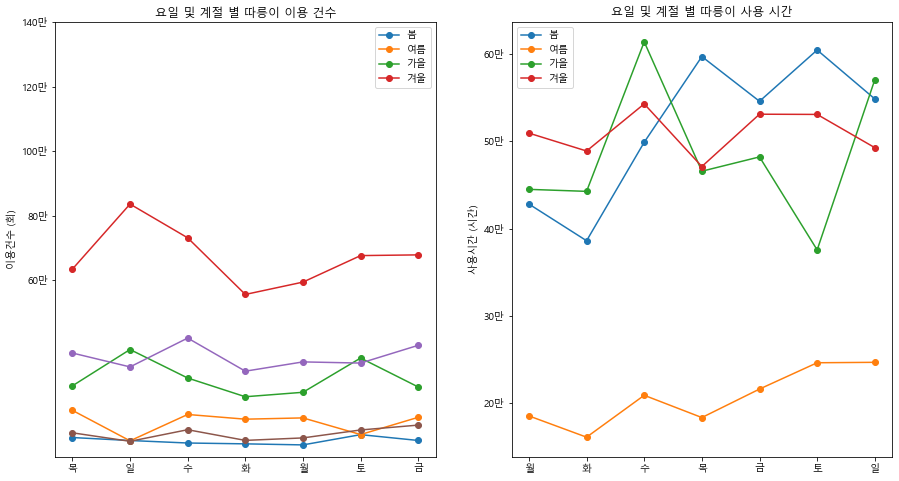

In [222]:
# 여러개 그래프('를 하나에 넣기 => subplot()
fig = plt.figure(figsize = (15,8))

ax1 = fig.add_subplot(121)   # 1행 2열 중에 1번 자리에 넣기
ax1.plot(pivot1, marker = 'o')
ax1.set_ylabel('이용건수 (회)')
ax1.set_yticks(np.arange(600000, 1600000, 200000), ('60만', '80만', '100만', '120만', '140만')) # 눈금 지정
ax1.set_title('요일 및 계절 별 따릉이 이용 건수')
ax1.legend(['봄','여름','가을','겨울']) 

ax2 = fig.add_subplot(122)   # 1행 2열 중에 2번 자리에 넣기
ax2.plot(pivot2, marker = 'o')
ax2.set_ylabel('사용시간 (시간)')
ax2.set_yticks(np.arange(200000, 650000, 100000), ('20만', '30만', '40만', '50만', '60만')) # 눈금 지정
ax2.set_title('요일 및 계절 별 따릉이 사용 시간')
ax2.legend(['봄','여름','가을','겨울']) 

plt.show()

## 분석

- 계절과 상관없이 나타나는 경향
    - 평일과 대비해 주말 이용 건수는 대체적으로 감소한다.
    - 평일과 대비해 주말 사용 시간은 증가하거나 감소폭이 적다.
        - 주말엔 나들이처럼 비교적 먼 거리를 이동하는 고객이 많다.
    
- 요일과 상관없이 나타나는 경향
    - 다른 계절과 대비해 여름엔 따릉이 이용이 꾸준하게 많다.
    - 다른 계절과 대비해 겨울엔 따릉이 이용이 정말 적다.
        - 겨울엔 손을 칼바람에 노출시켜야하는 것이 큰 이유 중 하나로 추측

- 가을이 제일 무난하게 타기 좋은 계절

- 굉장히 특이한 데이터를 가지고 있는 봄
    - 의외로 봄이 특정 요일을 제외하고 전반적으로 약세인데, 황사와 꽃가루가 영향인 것으로 추측된다.
    - 봄에서 수요일, 일요일에만 가장 활발하게 이용하는 이유
        - 봄엔 꽃구경처럼 가볍게 이동해서 즐길거리가 많은 계절
        - 좀더 여유로운 토요일엔 자가용으로 먼 지역으로 이동해서 꽃구경을 다닐 것

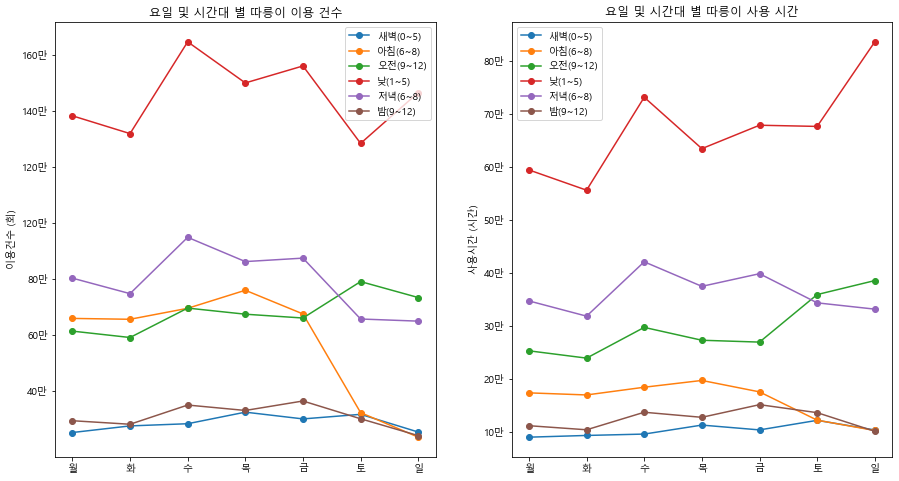

In [223]:
# 여러개 그래프('를 하나에 넣기 => subplot()
fig = plt.figure(figsize = (15,8))

ax1 = fig.add_subplot(121)   # 1행 2열 중에 1번 자리에 넣기
ax1.plot(pivot3, marker = 'o')
ax1.set_ylabel('이용건수 (회)')
ax1.set_yticks(np.arange(400000, 1800000, 200000), ('40만', '60만', '80만', '120만', '120만','140만','160만')) # 눈금 지정
ax1.set_title('요일 및 시간대 별 따릉이 이용 건수')
ax1.legend(['새벽(0~5)', '아침(6~8)', '오전(9~12)', '낮(1~5)', '저녁(6~8)', '밤(9~12)']) 

ax2 = fig.add_subplot(122)   # 1행 2열 중에 2번 자리에 넣기
ax2.plot(pivot4, marker = 'o')
ax2.set_ylabel('사용시간 (시간)')
ax2.set_yticks(np.arange(100000, 900000, 100000), ('10만', '20만', '30만', '40만', '50만', '60만', '70만', '80만')) # 눈금 지정
ax2.set_title('요일 및 시간대 별 따릉이 사용 시간')
ax2.legend(['새벽(0~5)', '아침(6~8)', '오전(9~12)', '낮(1~5)', '저녁(6~8)', '밤(9~12)']) 

plt.show()

## 분석

- 

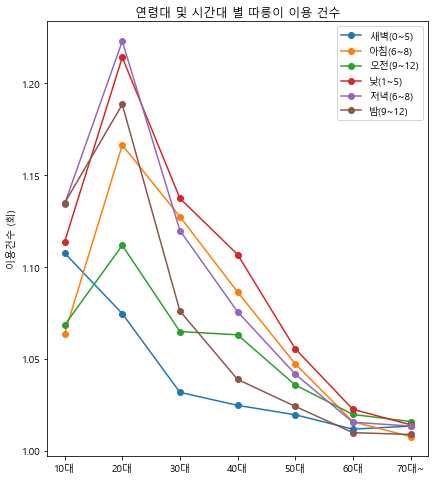

In [226]:
# 여러개 그래프('를 하나에 넣기 => subplot()
fig = plt.figure(figsize = (15,8))

ax1 = fig.add_subplot(121)   # 1행 2열 중에 1번 자리에 넣기
ax1.plot(pivot5, marker = 'o')
ax1.set_ylabel('이용건수 (회)')
ax1.set_title('연령대 및 시간대 별 따릉이 이용 건수')
ax1.legend(['새벽(0~5)', '아침(6~8)', '오전(9~12)', '낮(1~5)', '저녁(6~8)', '밤(9~12)']) 

plt.show()

## 분석

- 이용자 수: 20대 >> 30대 > 10대 > 40대 > 50대 > 60대 > 70대 이상
    - 30대부터는 자가용 이용률이 높아지기 때문일 것
    - 30대에서 40대로 가면서 전반적으로 급격히 이용률이 낮아지는 것은 가족 단위로 이동하는 비율이 높아지기 때문일 것
    - 노년층은 활동량이 적다.

- 10대의 특이한 데이터
    - 새벽에 이용이 많은 이유
        - 서울에서는 10대들이 밤 12시가 넘어서 새벽까지 학원을 다니는 케이스가 많다.
    - 아침과 오전에 이용이 적은 이유
        - 학교가 집에서 걸어서 갈만한 거리에 위치한 경우가 많음
        - 정류소나 역에서 자전거를 타야할만큼 거리가 제법 있는 회사들에 비해, 학교는 버스가 근처에서 학생들을 내려주는 경우가 많음.
        - 오전엔 보통 학교에서 수업을 듣기 때문에 이용이 굉장히 적다.
        
- 10대, 20대에서 밤, 저녁 시간대 이용이 굉장히 많다.
    - 밤늦게까지 학원 / 독서실 이용이 많기 때문
    - 왕성한 활동량에 비해 자가용 보유률이 적다.